In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_X_train = pd.read_csv('./data/nba/X_train.csv')
df_y_train = pd.read_csv('./data/nba/y_train.csv')
df_X_test = pd.read_csv('./data/nba/X_test.csv')

In [3]:
print(df_X_train.shape)
print(df_X_train.columns)
print(df_y_train.columns)

(52399, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [4]:
print(df_X_train[:4])
print(df_y_train[:4])

   PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE  \
0       2         557        15.5         0         0.7        2.1         2   
1       2         151        20.1         0         0.8        2.7         2   
2       3         448        14.2         0         0.8        5.1         2   
3       1         279        10.6         0         0.6        1.9         2   

   CLOSE_DEF_DIST  
0             0.0  
1             3.4  
2             0.1  
3             2.7  
   FGM
0    1
1    1
2    0
3    1


In [5]:
def pd2np(df):
    return df.values

In [6]:
X_train = pd2np(df_X_train)
y_train = pd2np(df_y_train)

X_test = pd2np(df_X_test)

In [7]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(52399, 8)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.1, random_state=0)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(47159, 8) (5240, 8)
(47159, 1) (5240, 1)


## First of all, we use Perceptron model to train the dataset.

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_valid_std = sc.transform(X_valid)

ppn = Perceptron(max_iter=1000, eta0=0.0001, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_valid_std)
print('Accuracy (perceptron): %.2f' % accuracy_score(y_valid, y_pred))

C:\Users\yuwei\.conda\envs\dl\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy (perceptron): 0.59


## Then, train Decision Tree Classifier model to predict.

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2,
                              random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_valid)
print('Accuracy (tree): %.2f' % accuracy_score(y_valid, y_pred))

Accuracy (tree): 0.62


## Last but not least, a Random Forest Classifier was used.

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                max_depth=7,
                                n_estimators=50, 
                                random_state=0,
                                n_jobs=4)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_valid)
print('Accuracy (random forest): %.2f' % accuracy_score(y_valid, y_pred))

C:\Users\yuwei\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy (random forest): 0.63


## After training, we got the best model-random forest classifier and used it to plot the error(accuracy) curve. In the picture, we can see that the training error curve and the verification error curve intersect at a point deeper than the depth 7, so the depth 7 does not over-fitting.

C:\Users\yuwei\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\yuwei\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\yuwei\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\yuwei\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.pat

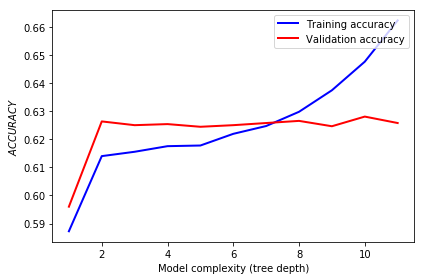

In [12]:
accu_train = []
accu_test = []

max_degree = 12

for d in range(1, max_degree):
    forest = RandomForestClassifier(criterion='entropy',
                                max_depth=d,
                                n_estimators=50, 
                                random_state=0,
                                n_jobs=4)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_valid_pred = forest.predict(X_valid)
    
    accu_train.append(accuracy_score(y_train, y_train_pred))
    accu_test.append(accuracy_score(y_valid, y_valid_pred))
    

plt.plot(range(1, max_degree), accu_train, label = 'Training accuracy', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), accu_test, label = 'Validation accuracy', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (tree depth)')
plt.ylabel('$ACCURACY$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

## Use LASSO for Feature Selection to get 3 most important features.

In [13]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(alpha = 0.001)
lr_lasso.fit(X_train, y_train)

epsilon = 1e-2
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print('Selected attributes: {}'.format(df_X_train.columns.values[idxs]))

Selected attributes: ['SHOT_DIST' 'PTS_TYPE' 'CLOSE_DEF_DIST']


## Now, we only use 3 selected features to retrain the model, then use this trained model to predict X_test and export y_pred.csv.

In [14]:
df_W_train = df_X_train[['SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST']]
#print(df_W_train[0:4])

W_train = pd2np(df_W_train)
y_train = pd2np(df_y_train)
W_train, W_valid, y_train, y_valid = train_test_split(
        W_train, y_train, test_size=0.1, random_state=0)

forest = RandomForestClassifier(criterion='entropy',
                                max_depth=7,
                                n_estimators=50, 
                                random_state=0,
                                n_jobs=4)
forest.fit(W_train, y_train)

y_pred = forest.predict(W_valid)
print('Accuracy with 3 feactures selected (random forest): %.2f' % accuracy_score(y_valid, y_pred))

y_pred = forest.predict(pd2np(df_X_test[['SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST']]))
y_pred = pd.DataFrame(y_pred, columns=['FGM'])
y_pred.to_csv('./output/y_pred.csv', index=False)

C:\Users\yuwei\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy with 3 feactures selected (random forest): 0.62
